In [1]:
import pandas as pd
# import dataset
folder_path = 'C:/capstone/'
train_identity = pd.read_csv(f'{folder_path}train_identity.csv')
train_transaction = pd.read_csv(f'{folder_path}train_transaction.csv')
test_identity = pd.read_csv(f'{folder_path}test_identity.csv')
test_transaction = pd.read_csv(f'{folder_path}test_transaction.csv')
sub = pd.read_csv(f'{folder_path}sample_submission.csv')


In [25]:
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')
print(train.shape)
print(test.shape)


(590540, 434)
(506691, 433)


In [60]:
test.head()


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
a=train.isnull().any().sum()
print(a, 'columns with NAs in training set')

414 columns with NAs in training set


In [4]:
a=test.isnull().any().sum()
print(a, 'columns with NAs in test set')

385 columns with NAs in test set


In [11]:
import gc
NAs_df = train.isna()
NAs_groups={}
i_cols = train.columns
for col in train.columns:
    cur_group = NAs_df[col].sum()
    try:
        NAs_groups[cur_group].append(col)
    except:
        NAs_groups[cur_group]=[col]
del NAs_df; x=gc.collect()

for k,v in NAs_groups.items():
    print('TOTAL NAs =',k)
    print(v)

TOTAL NAs = 0
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']
TOTAL NAs = 8933
['card2']
TOTAL NAs = 1565
['card3']
TOTAL NAs = 1577
['card4']
TOTAL NAs = 4259
['card5']
TOTAL NAs = 1571
['card6']
TOTAL NAs = 65706
['addr1', 'addr2']
TOTAL NAs = 352271
['dist1']
TOTAL NAs = 552913
['dist2']
TOTAL NAs = 94456
['P_emaildomain']
TOTAL NAs = 453249
['R_emaildomain']
TOTAL NAs = 1269
['D1', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315']
TOTAL NAs = 280797
['D2']
TOTAL NAs = 262878
['D3']
TOTAL NAs = 168922
['D4']
TOTAL NAs = 309841
['D5']
TOTAL NAs = 517353
['D6']
TOTAL NAs = 551623
['D7']
TOTAL NAs = 515614
['D8', 'D9', 'id_09', 'id_10']
TOTAL NAs = 76022
['D10']
TOTAL NAs = 279287
['D11', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']
TOTAL NAs = 525823
['D12']
TOTAL NAs = 528588
['D13']
TOTAL NAs = 528

In [26]:
#delete columns with more than 1500 NAs, and unique value less than 5
i=433
j=0
while i >= 0 :
        x = train.columns[i]
        if (train[x].nunique() < 5 and x != 'isFraud') or train[x].isnull().sum() > 1500:
            del train[x]
            j=j+1
        i=i-1
print(j)

335


In [13]:
print(train.shape)
train.head()
  

(590540, 99)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,C1,C2,C3,C4,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,2.0,5.0,0.0,0.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,H,4497,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#check how many rows has NAs
print(train.isnull().any(axis=1).sum())
#drop rows with NAs
train = train.dropna()

1441


In [28]:
#check if there is any NAs left
print(train.isnull().any().sum())


0


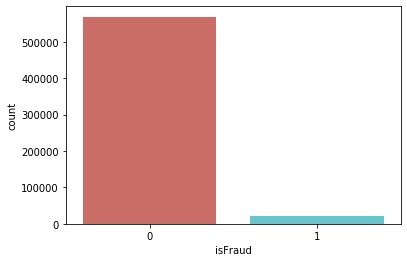

<Figure size 432x288 with 0 Axes>

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='isFraud',data=train,palette='hls')
plt.show()
plt.savefig('count_plot')

In [19]:
#New dataframe with no NAs
print(train.shape)



(589099, 99)


In [11]:
fraud=len(train[train['isFraud']==1])
legit=len(train[train['isFraud']==0])
pct_of_fraud = fraud/(fraud+legit)
print("percentage of fraud is", pct_of_fraud*100)
pct_of_legit = legit/(fraud+legit)
print("percentage of legit is", pct_of_legit*100)

percentage of fraud is 3.4973748045744433
percentage of legit is 96.50262519542557


In [ ]:
# Classes are imblanced, the ratio of legit is 96.5%

In [29]:
from sklearn import utils
from imblearn.over_sampling import SMOTE
import numpy as np
i=0
while i < 99 :
        x = train.columns[i]
        if utils.multiclass.type_of_target(train[x])== 'continuous' :
            train[x] = train[x].astype('int')
            print(utils.multiclass.type_of_target(train[x]))
        i=i+1

multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass
multiclass


In [32]:
print(train["ProductCD"])
train['ProductCD'] = train['ProductCD'].map({'W': 1, 'H': 2,'C': 3, 'S': 4,'R': 5})
print(train["ProductCD"])
train["ProductCD"] = train["ProductCD"].astype('int')


In [33]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = train.loc[:, train.columns != 'isFraud']
Y = train.loc[:, train.columns == 'isFraud']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=42,ratio=1)
train_os,train_os_y=os.fit_sample(X, Y)
train_os.shape
train_os_y.shape
columns = X.columns
train_os = pd.DataFrame(data=train_os,columns=columns )
train_osy= pd.DataFrame(data=train_os_y,columns=['isFraud'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(train_os))
print("Number of legit",len(train_osy[train_osy['isFraud']==0]))
print("Number of fraud in oversampled data is ",len(train_osy[train_osy['isFraud']==1]))

C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  1136992
Number of legit 568496
Number of fraud in oversampled data is  568496


In [49]:
train_vars=train.columns.values.tolist()
y=['isFraud']
X=[i for i in train_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(train_os, train_osy.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklea

C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn

C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn

C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn

[False False False False False False False False False False False False
 False False False False False False False False  True False  True  True
 False  True  True False  True  True False False False False False False
 False False False False False  True False  True False False False False
 False False False False False False False False  True False False  True
  True  True False False  True False  True False False False False False
 False  True False False False  True  True  True  True False False False
 False False False False False False False False False False False False
 False False]
[78 79 77 22 75 35 10 41  9  6 48  4 17 28 56  3  5 36  2 19  1 59  1  1
 47  1  1 66  1  1 71 42 29 33 30 31 45 34 49 43 58  1 18  1 53 69 62 55
 72 70 60 64 50 51 67 68  1 65  7  1  1  1 32 40  1 57  1 52 12 54 37 24
 11  1 27 63 74  1  1  1  1  8 26 16 44 61 13 20 21 76 39 38 25 14 46 23
 15 73]


In [51]:
listranking = rfe.ranking_.tolist()

In [52]:
print(listranking)

[78, 79, 77, 22, 75, 35, 10, 41, 9, 6, 48, 4, 17, 28, 56, 3, 5, 36, 2, 19, 1, 59, 1, 1, 47, 1, 1, 66, 1, 1, 71, 42, 29, 33, 30, 31, 45, 34, 49, 43, 58, 1, 18, 1, 53, 69, 62, 55, 72, 70, 60, 64, 50, 51, 67, 68, 1, 65, 7, 1, 1, 1, 32, 40, 1, 57, 1, 52, 12, 54, 37, 24, 11, 1, 27, 63, 74, 1, 1, 1, 1, 8, 26, 16, 44, 61, 13, 20, 21, 76, 39, 38, 25, 14, 46, 23, 15, 73]


In [53]:
print(columns)

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
       'C11', 'C12', 'C13', 'C14', 'D1', 'V95', 'V96', 'V97', 'V98', 'V99',
       'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V108', 'V109',
       'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V123', 'V124',
       'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133',
       'V134', 'V135', 'V136', 'V137', 'V279', 'V280', 'V281', 'V282', 'V283',
       'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292',
       'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301',
       'V302', 'V303', 'V304', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311',
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object')


In [79]:
columns1=columns.tolist()
i=97
while i >= 0 :
    if listranking[i] != 1 :
        columns1.remove(columns1[i]) 
    i=i-1
print(columns1)

['V95', 'V97', 'V98', 'V100', 'V101', 'V103', 'V104', 'V123', 'V125', 'V279', 'V282', 'V283', 'V284', 'V287', 'V289', 'V296', 'V300', 'V301', 'V302', 'V303']


In [35]:
columns1=['V95', 'V97', 'V98', 'V100', 'V101', 'V103', 'V104', 'V123', 'V125', 'V279', 'V282', 'V283', 'V284', 'V287', 'V289', 'V296', 'V300', 'V301', 'V302', 'V303']
train_os = train_os[columns1]
train_os.head()

,V95,V97,V98,V100,V101,V103,V104,V123,V125,V279,V282,V283,V284,V287,V289,V296,V300,V301,V302,V303
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,28.0,0.0,4.0,1.0,24.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [36]:
import statsmodels.api as sm
logit_model=sm.Logit(train_osy,train_os)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.613030
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.116       
Dependent Variable: isFraud          AIC:              1394060.0925
Date:               2019-11-25 15:57 BIC:              1394298.9704
No. Observations:   1136992          Log-Likelihood:   -6.9701e+05 
Df Model:           19               LL-Null:          -7.8810e+05 
Df Residuals:       1136972          LLR p-value:      0.0000      
Converged:          1.0000           Scale:            1.0000      
No. Iterations:     7.0000                                         
---------------------------------------------------------------------
           Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
---------------------------------------------------------------------
V95        0.2814     0.0447      6.2925   0.0000    0.1938    0.3691
V97       -0.2896     0.0075    -

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(train_os, train_osy, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yinwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.71


In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred,labels=[1])
print(confusion_matrix)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[118865]]
[[122415  48037]
 [ 51781 118865]]


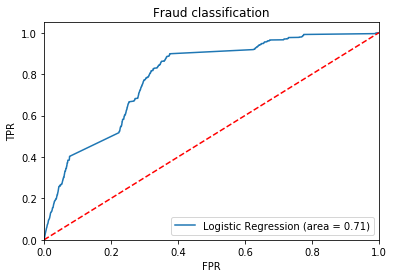

In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Fraud classification')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71    170452
           1       0.71      0.70      0.70    170646

    accuracy                           0.71    341098
   macro avg       0.71      0.71      0.71    341098
weighted avg       0.71      0.71      0.71    341098



In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7073626934194864
Precision: 0.7121843956333657
Recall: 0.6965589583113581


In [43]:
import numpy as np
print(np.exp(0))

1.0


In [53]:
train1 = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

In [54]:
column2=['TransactionID','isFraud','V95', 'V97', 'V98', 'V100', 'V101', 'V103', 'V104', 'V123', 'V125', 'V279', 'V282', 'V283', 'V284', 'V287', 'V289', 'V296', 'V300', 'V301', 'V302', 'V303']
train1=train1[column2]

In [55]:
train1['result']=1/(1+np.exp(-(train1['V95']*0.2814 -train1['V97']*0.2896 + train1['V98']*0.0941+train1['V100']*0.1703+train1['V101']*0.2390+ train1['V103']*0.2626 + train1['V104']*0.4487 -train1['V123'] *0.9128 + train1['V125']*0.1754 -train1['V279']*0.5081 -train1['V282']*0.1099 + train1['V283']*0.4681+ train1['V284']*0.7418 + train1['V287']*0.0996 - train1['V289']*0.3902+ train1['V296']*0.1611 -train1['V300']*0.4224 +train1['V301']*0.1497 +train1['V302']*0.4643 + train1['V303']*0.8053)))

In [56]:
train1.head()

,TransactionID,isFraud,V95,V97,V98,V100,V101,V103,V104,V123,...,V283,V284,V287,V289,V296,V300,V301,V302,V303,result
0,2987000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.406320
1,2987001,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.406320
2,2987002,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.406320
3,2987003,0,1.0,28.0,0.0,4.0,1.0,24.0,0.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.189709
4,2987004,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.708973
